In [1]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = joblib.load('../models/tfidf_features_labels.pkl')
logreg = joblib.load('../models/logreg_model.pkl')
svm = joblib.load('../models/svm_model.pkl')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)


In [4]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


In [5]:
report_logreg = classification_report(y_test, y_pred_logreg, digits=4)
report_svm = classification_report(y_test, y_pred_svm, digits=4)


In [6]:
def plot_confusion(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


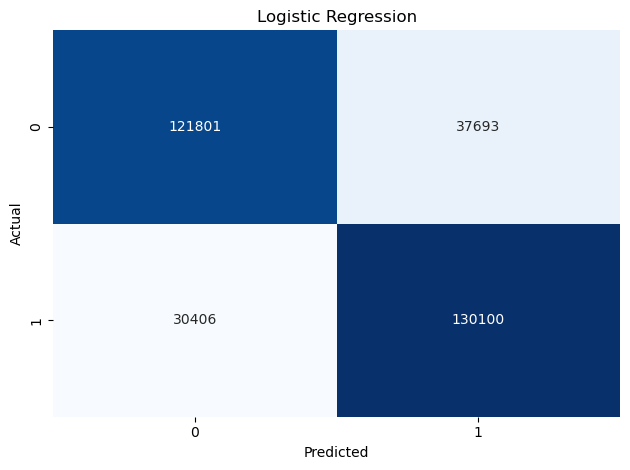

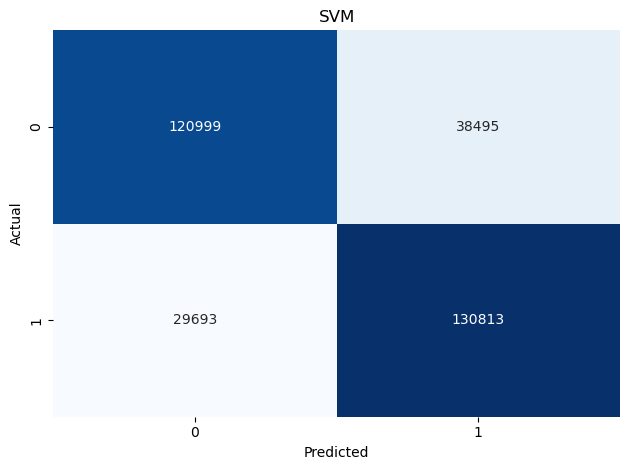

In [7]:
plot_confusion(confusion_matrix(y_test, y_pred_logreg), 'Logistic Regression')
plot_confusion(confusion_matrix(y_test, y_pred_svm), 'SVM')


In [8]:
{
    'LogisticRegression': {'accuracy': acc_logreg, 'f1': f1_logreg},
    'SVM': {'accuracy': acc_svm, 'f1': f1_svm}
}


{'LogisticRegression': {'accuracy': 0.787190625, 'f1': 0.7925701875424537},
 'SVM': {'accuracy': 0.7869125, 'f1': 0.7932531669365157}}